In [1]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from dataset import MonuSegDataSet
from Sampler import DinoPoweredSampler
import matplotlib.pyplot as plt
from auxilary.utils import *


In [2]:
config = readConfig("config.sys")

loading Images from path: Dataset/trainNormal/


100%|██████████| 85536/85536 [02:55<00:00, 488.02it/s] 
Using cache found in /home/blue/.cache/torch/hub/facebookresearch_dinov2_main
xFormers not available
xFormers not available
100%|██████████| 42768/42768 [13:12<00:00, 53.99it/s]


Unique clusters: [0 1 2 3 4 5 6 7 8]


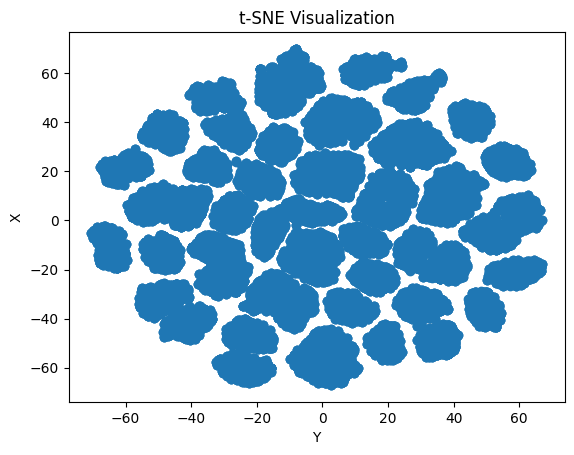

In [3]:


trainPaths = config["trainDataset"]
sampleTrainImages = load_images(trainPaths)
dino_model = load_sampling_model(modelType="small")
train_dataset = MonuSegDataSet(config["trainDataset"])

sampler = DinoPoweredSampler(images=sampleTrainImages, dino_model=dino_model, config=config)
train_data = DataLoader(train_dataset,batch_size=config["batch_size"], sampler=sampler)

In [ ]:
# Test DataLoader
batch_count = 0
for i, batch in enumerate(train_data):
    batch_count += 1
    print(f"Batch {i+1} of size {len(batch)}")
    # For visualization, let's assume each element in the batch is an image
    for j, image in enumerate(batch):
        plt.subplot(4, 4, j+1)
        plt.imshow(image)
    plt.show()

print(f"Total batches: {batch_count}")

# Check Dice Performance

In [33]:
from auxilary.utils import *
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [23]:
image1 = "Dataset/testNormal/0_label.png"
image2 = "Outputs/experiment_09-12_10.37.19/testResults/0_pred_color.png"

In [24]:
img1 = cv2.imread(image1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image2, cv2.IMREAD_GRAYSCALE)
img1 = img1[0:800, 0:800]
img2 = img2[0:800, 0:800]

In [25]:
print(dice_coef(img1, img2))

0.0028350881788509912


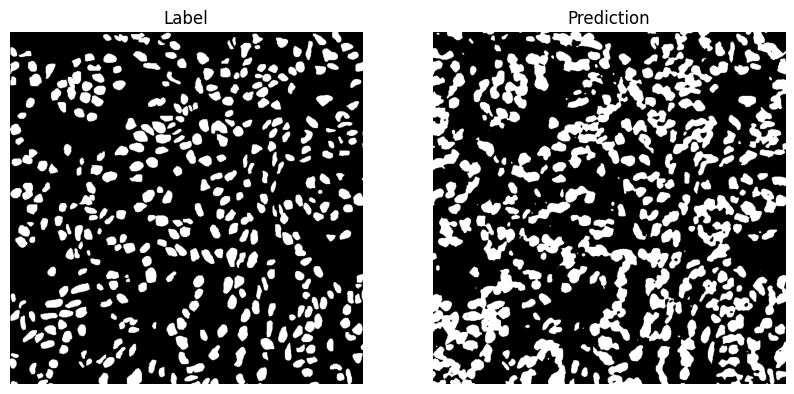

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Display img1
axes[0].imshow(img1, cmap='gray')
axes[0].set_title('Label')
axes[0].axis('off')

# Display img2
axes[1].imshow(img2, cmap='gray')
axes[1].set_title('Prediction')
axes[1].axis('off')

plt.show()

In [34]:
def calc_confusion_matrix(label, pred,num_classes):
    category = num_classes*label + pred
    confusion_matrix = np.zeros((num_classes,num_classes))
    for i in range(category.shape[0]):
        oneD_array = np.reshape(category[i],(-1))
        bincount = np.bincount(oneD_array,minlength=num_classes**2)
        confusion_matrix += np.reshape(bincount,(num_classes,num_classes))
   
    return confusion_matrix

In [37]:
cm = confusion_matrix(img1, img2)
print(cm)

ValueError: multilabel-indicator is not supported

In [ ]:
print